In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/mandi_prices.csv')

BASIC EXPLORATORY DATA ANALYSIS(EDA)

In [41]:
df.info()  
df.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18838 entries, 0 to 18837
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   State         18838 non-null  object        
 1   District      18838 non-null  object        
 2   Market        18838 non-null  object        
 3   Commodity     18838 non-null  object        
 4   Variety       18838 non-null  object        
 5   Grade         18838 non-null  object        
 6   Arrival_Date  18838 non-null  datetime64[ns]
 7   Min_Price     18838 non-null  float64       
 8   Max_Price     18838 non-null  float64       
 9   Modal_Price   18838 non-null  float64       
 10  Market_Short  18838 non-null  object        
 11  Price_Range   18838 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 1.7+ MB


State           0
District        0
Market          0
Commodity       0
Variety         0
Grade           0
Arrival_Date    0
Min_Price       0
Max_Price       0
Modal_Price     0
Market_Short    0
Price_Range     0
dtype: int64

In [6]:
#changing column names for better readibility
df.rename(columns={
    'Min_x0020_Price': 'Min_Price',
    'Max_x0020_Price': 'Max_Price',
    'Modal_x0020_Price': 'Modal_Price'
}, inplace=True)
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date']) #changing datatype of arrival_date from str to datetime

In [11]:
#getting the overal spread of the dataset
df.describe()

,Arrival_Date,Min_Price,Max_Price,Modal_Price
count,18838,18838.000000,18838.000000,18838.000000
mean,2025-04-04 00:00:00,3828.726178,4493.997324,4278.119560
min,2025-04-04 00:00:00,0.000000,0.000000,2.000000
25%,2025-04-04 00:00:00,1740.000000,2000.000000,2000.000000
50%,2025-04-04 00:00:00,3000.000000,3400.000000,3160.000000
75%,2025-04-04 00:00:00,4986.250000,5545.750000,5400.000000
max,2025-04-04 00:00:00,118000.000000,130000.000000,120000.000000
std,NaN,4536.728717,5314.417416,4940.495762


In [7]:
#checking unique values in my dataset
print("Unique States:", df['State'].nunique())
print("Unique Districts:", df['District'].nunique())
print("Unique Markets:", df['Market'].nunique())
print("Unique Commodities:", df['Commodity'].nunique())
print("Unique Grades:", df['Grade'].nunique())
print("Unique Varieties:", df['Variety'].nunique())

Unique States: 27
Unique Districts: 444
Unique Markets: 1479
Unique Commodities: 219
Unique Grades: 6
Unique Varieties: 461


In [8]:
#top 'n' frequent items for more easy use in analysis later
df['State'].value_counts().head(10)


State
Tamil Nadu          6642
Uttar Pradesh       2924
Madhya Pradesh      1770
Kerala              1344
Gujarat              880
Maharashtra          879
Punjab               744
Haryana              697
West Bengal          539
Himachal Pradesh     459
Name: count, dtype: int64

In [9]:
df['Market'].value_counts().head(10)

Market
Tiruvannamalai(Uzhavar Sandhai )      68
Hosur(Uzhavar Sandhai )               66
Vellore                               65
Anna nagar(Uzhavar Sandhai )          65
Ammapet(Uzhavar Sandhai )             63
Thathakapatti(Uzhavar Sandhai )       63
RSPuram(Uzhavar Sandhai )             63
Kahithapattarai(Uzhavar Sandhai )     61
Sooramangalam(Uzhavar Sandhai )       61
Jameenrayapettai(Uzhavar Sandhai )    61
Name: count, dtype: int64

In [7]:
df['Commodity'].value_counts().head(10)

Commodity
Wheat           850
Onion           675
Tomato          650
Potato          647
Brinjal         576
Green Chilli    545
Banana          438
Cabbage         436
Bottle gourd    429
Cauliflower     421
Name: count, dtype: int64

OBJECTIVE 1: STATE-WISE MARKET PERFORMANCE
Identify which states have the most active markets based on the number of recorded transactions.

We have visualized the top 10 states with the most active markets based on the number of transactions recorded

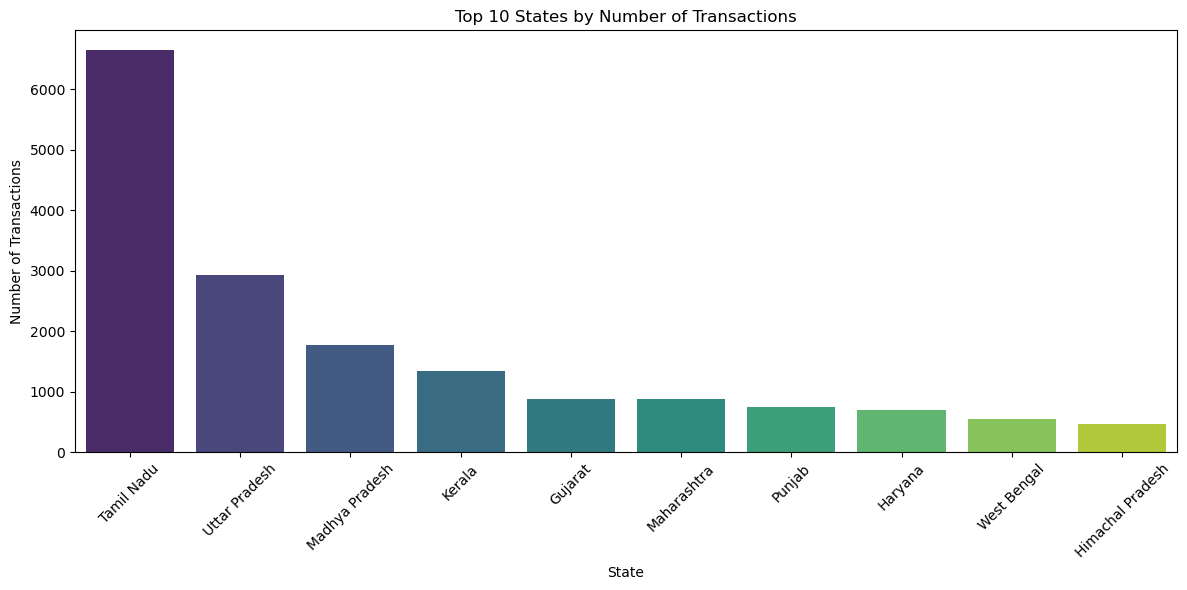

In [42]:
#top 10 states by market performance
top_states = df['State'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_states.index, y=top_states.values, hue=top_states.index, palette='viridis', legend=False)
plt.title("Top 10 States by Number of Transactions")
plt.xlabel("State")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


OBJECTIVE 2: PRICE-STABILITY ACROSS MARKETS
Analyzing how much the prices fluctuate across markets for different commodities.

We have visualized the difference in costs for certain commodities across markets over the country

In [11]:
# Clean unwanted text from 'Market'
df['Market'] = df['Market'].str.replace(r'\(.*?\)', '', regex=True).str.strip()

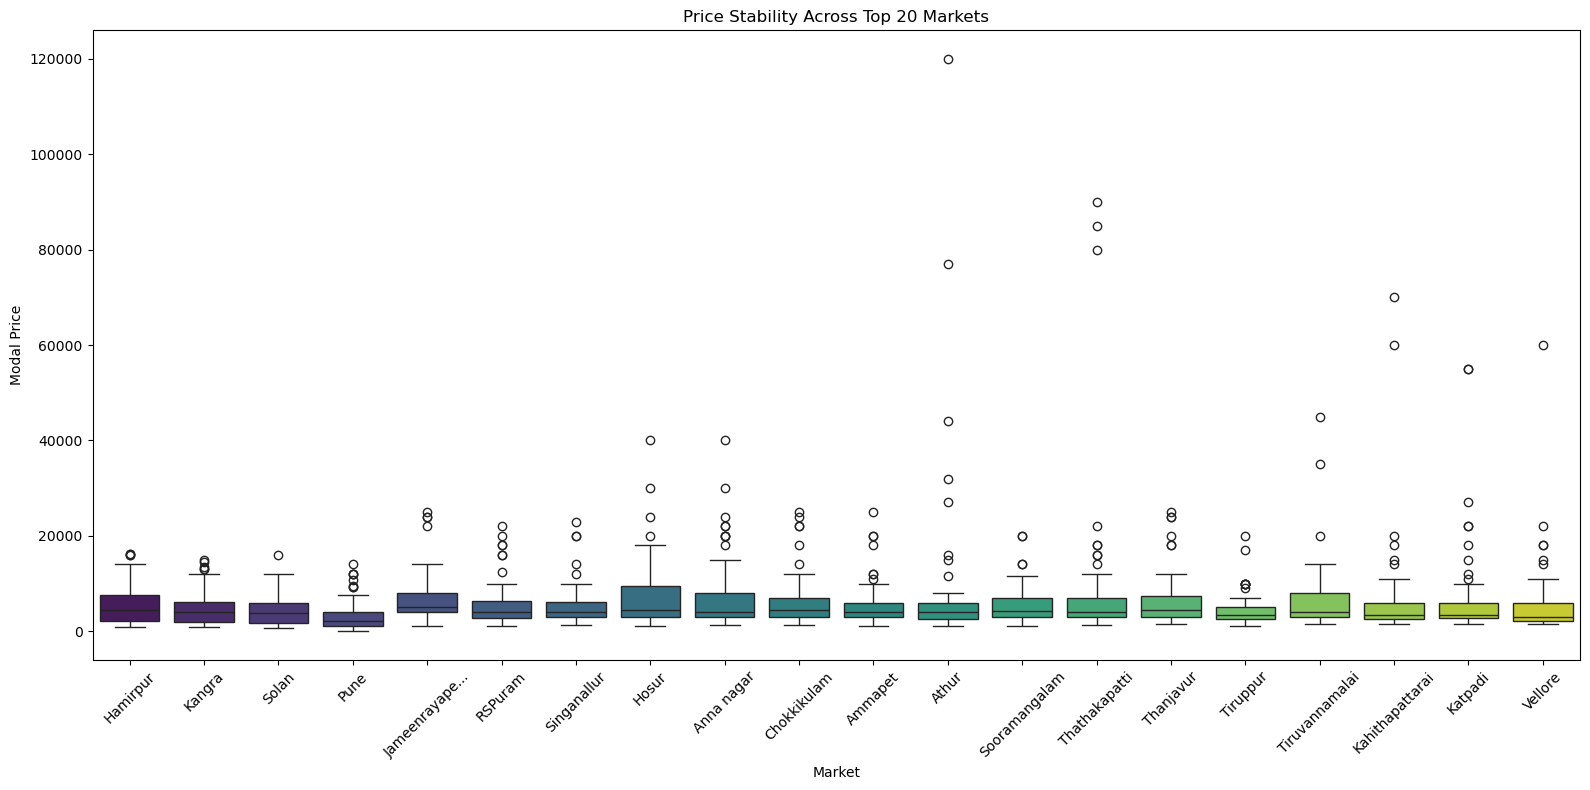

In [12]:

# Create a shortened version of Market names
df['Market_Short'] = df['Market'].apply(lambda x: x if len(x) <= 15 else x[:12] + '...')

# Get top 20 markets by frequency
top_markets = df['Market'].value_counts().head(20).index

# Filter the data for only top 20 markets
subset_df = df[df['Market'].isin(top_markets)].copy()

# Recompute Market_Short for the subset (optional but safe)
subset_df['Market_Short'] = subset_df['Market'].apply(lambda x: x if len(x) <= 15 else x[:12] + '...')

# Plotting boxplot for price stability
plt.figure(figsize=(16, 8))
sns.boxplot(data=subset_df, x='Market_Short', y='Modal_Price', hue='Market_Short', palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title('Price Stability Across Top 20 Markets')
plt.xlabel('Market')
plt.ylabel('Modal Price')
plt.tight_layout()
plt.show()


OBJECTIVE 3: COMMODITY-WISE PRICE DISTRIBUTION
 Analyzing how prices vary across different commodities.

Finding out how the prices are spread out for each commodities

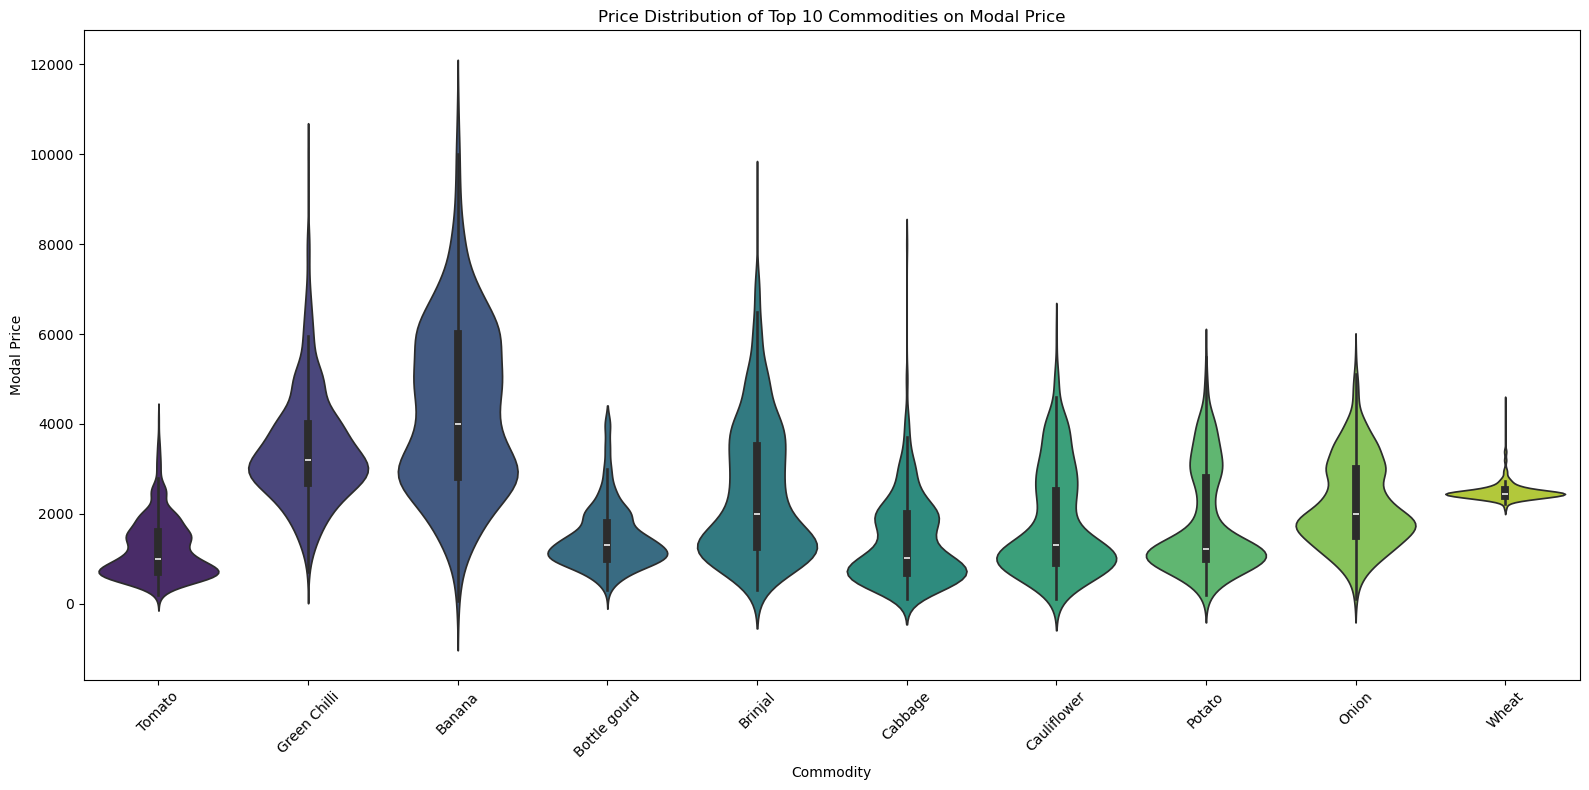

In [26]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(16, 8))
sns.violinplot(data=subset_df, x='Commodity', y='Modal_Price', palette='viridis')
plt.xticks(rotation=45)
plt.title('Price Distribution of Top 10 Commodities on Modal Price')
plt.xlabel('Commodity')
plt.ylabel('Modal Price')
plt.tight_layout()
plt.show()

OBJECTIVE 4: ROLE OF MARKET TYPE(GRADE) IN PRICING ACROSS COMMODITIES
Analyzing how different market types (represented by Grades) influence the pricing of various commodities.

Our main analysis here is- Does the price of the commodity change with respect to the grade of the market(Local or FAQ)?

In [11]:
df['Grade'].unique()

array(['FAQ', 'Large', 'Non-FAQ', 'Local', 'Medium', 'Small'],
      dtype=object)

In [15]:
df['Commodity'].nunique()

219

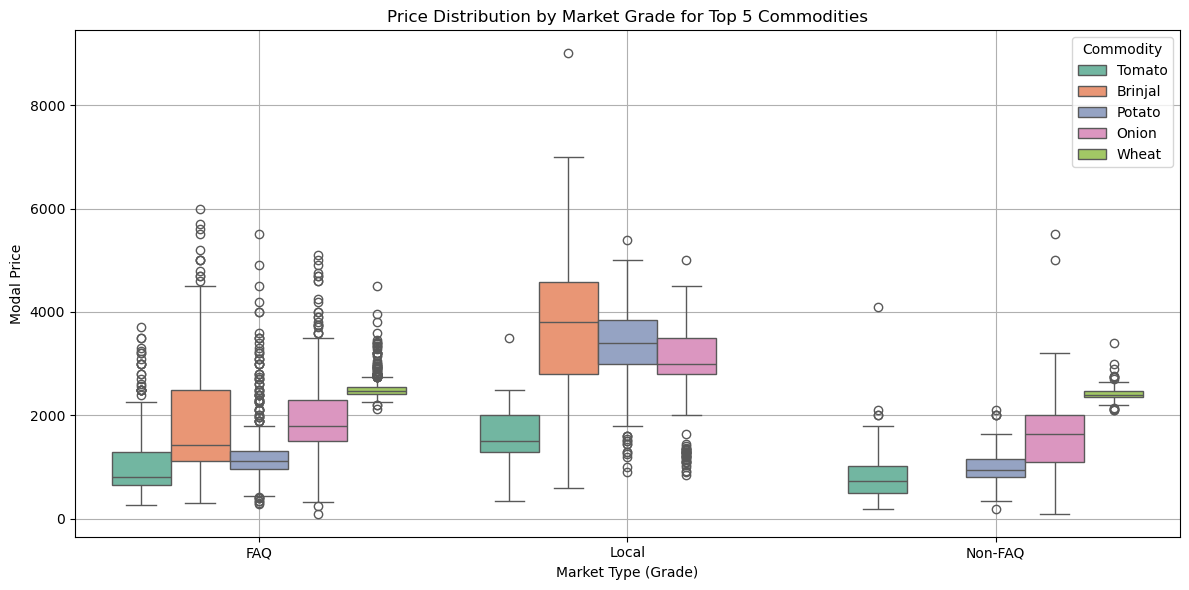

In [14]:

# top 5 commodities taken to avoid cluster
top_commodities = df['Commodity'].value_counts().head(5).index
filtered_df = df[df['Commodity'].isin(top_commodities)]

plt.figure(figsize=(12, 6))

sns.boxplot(data=filtered_df, x='Grade', y='Modal_Price', hue='Commodity', palette='Set2')

plt.title('Price Distribution by Market Grade for Top 5 Commodities')
plt.xlabel('Market Type (Grade)')
plt.ylabel('Modal Price')
plt.legend(title='Commodity', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


OBJECTIVE 5: PRICE STABILITY INDEX
Identifying which commodities have the most and least stable prices across all markets.

Which commodity has the most stable prices across all markets?

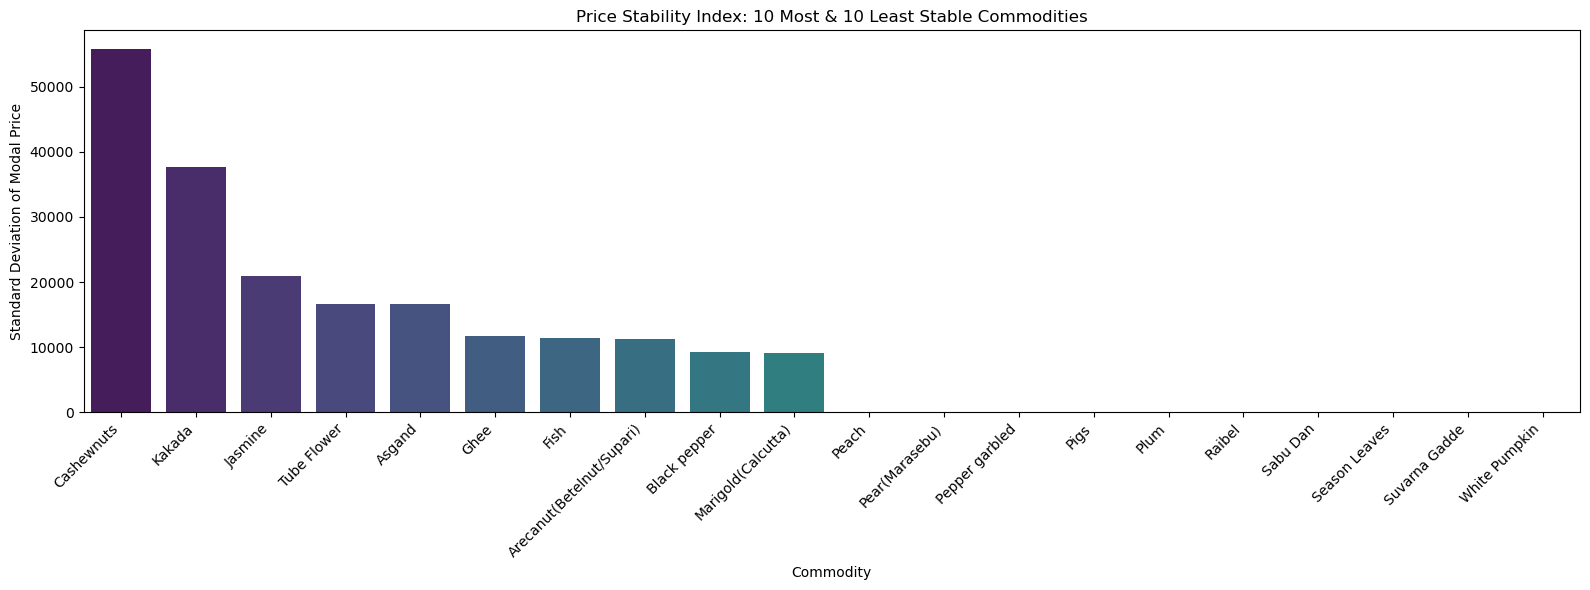

In [28]:
# Step 1: Compute standard deviation of modal prices for each commodity
price_std = df.groupby('Commodity')['Modal_Price'].std().sort_values(ascending=False)

# Step 2: Get exactly top 10 and bottom 10 (no overlap)
top_10 = price_std.head(10)
bottom_10 = price_std[~price_std.index.isin(top_10.index)].tail(10)

# Step 3: Combine for plotting
selected = pd.concat([top_10, bottom_10]).reset_index()
selected.columns = ['Commodity', 'Price StdDev']

# Step 4: Plot
plt.figure(figsize=(16,6))
sns.barplot(data=selected, x='Commodity', y='Price StdDev', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Price Stability Index: 10 Most & 10 Least Stable Commodities')
plt.ylabel('Standard Deviation of Modal Price')
plt.xlabel('Commodity')
plt.tight_layout()
plt.show()


OBJECTIVE 6: MARKET-WISE PRICE VOTALITY ANALYSIS
Analyzing the average price volatility across different markets by calculating the range between maximum and minimum prices

In each market, how is the pricing changing? Which are the most volatile ones and which are the stable ones?
To calculate this, we have introduced a new column named 'Price_Range' which is equal to the difference of max and min price.

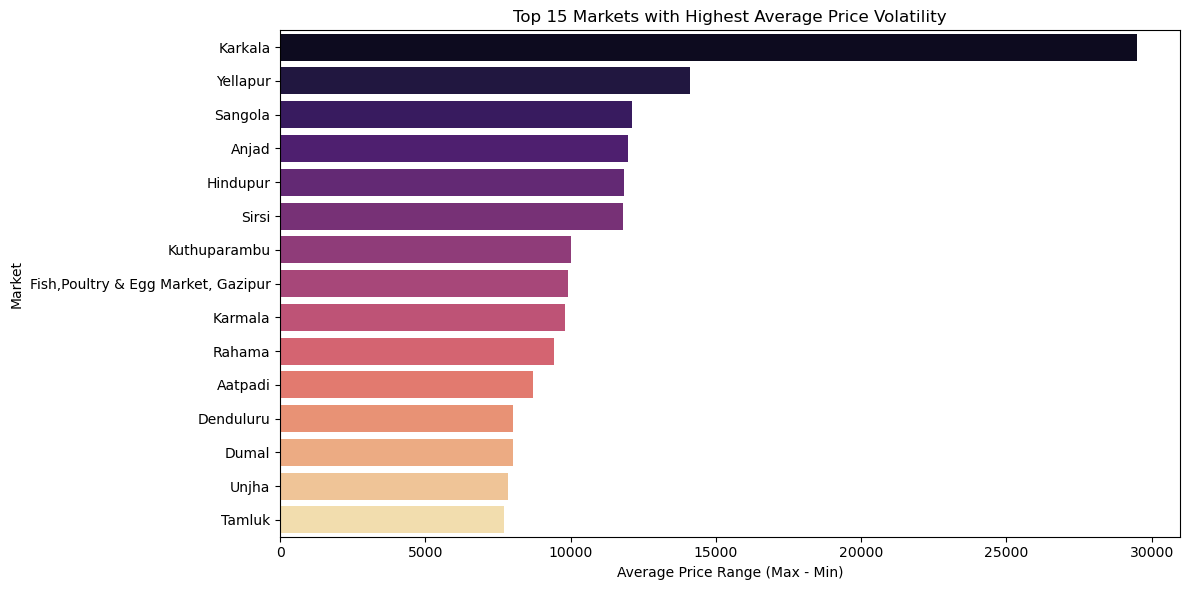

In [29]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df['Price_Range'] = df['Max_Price'] - df['Min_Price']

# Step 2: Group by Market and calculate average volatility
volatility_df = df.groupby('Market')['Price_Range'].mean().sort_values(ascending=False).head(15)

# Step 3: Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=volatility_df.values, y=volatility_df.index, palette='magma')
plt.title('Top 15 Markets with Highest Average Price Volatility')
plt.xlabel('Average Price Range (Max - Min)')
plt.ylabel('Market')
plt.tight_layout()
plt.show()



OBJECTIVE 7: MARKET-WISE COMMODITY CORRELATION
Exploring how the prices of different commodities are correlated across markets on the same date to identify complementary or substitutable pricing patterns.

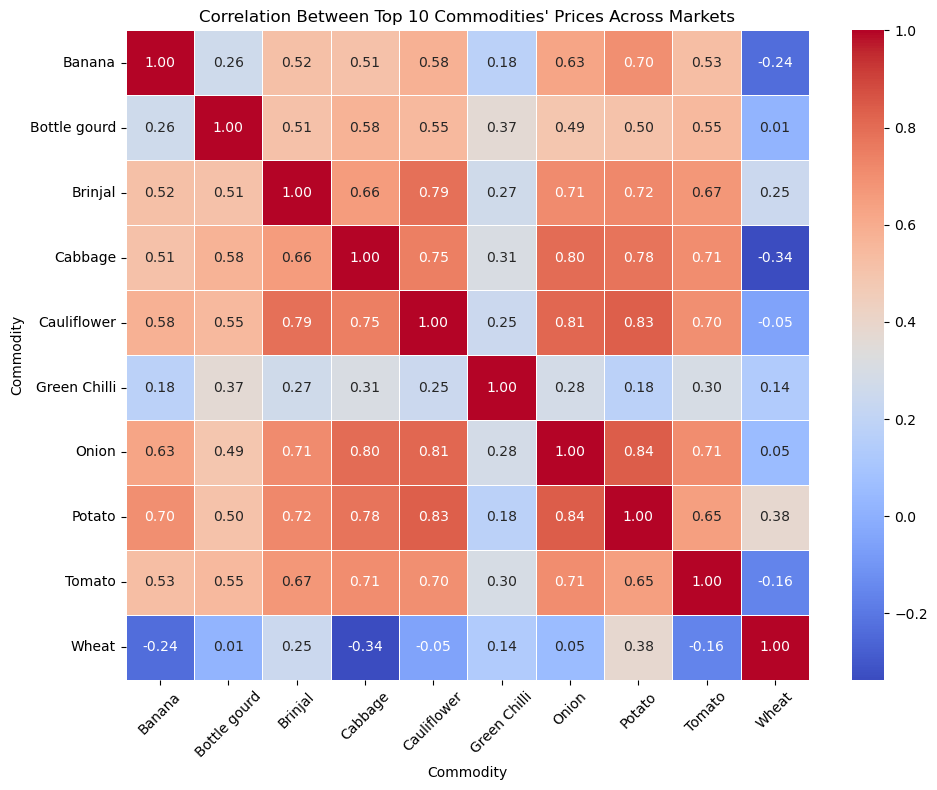

In [32]:
# Step 1: Get top 10 commodities by frequency
top_commodities = df['Commodity'].value_counts().head(10).index

# Step 2: Filter the data for only those commodities
filtered_df = df[df['Commodity'].isin(top_commodities)]

# Step 3: Pivot the table (Market x Commodity)
pivot_df = filtered_df.pivot_table(index='Market', columns='Commodity', values='Modal_Price')

# Step 4: Drop markets with too many missing values
pivot_df = pivot_df.dropna(thresh=5)  # keep rows with at least 5 non-NaN values

# Step 5: Correlation matrix
correlation_matrix = pivot_df.corr()

# Step 6: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Top 10 Commodities' Prices Across Markets")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


STATISTICAL ANALYSIS ON THE DATA

1. Understanding central tendencies and spread of prices.

In [32]:
df.groupby('Commodity')['Modal_Price'].describe().sort_values('mean', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Commodity,,,,,,,,
poppy seeds,2.0,99500.000000,3535.533906,97000.0,98250.00,99500.0,100750.00,102000.0
Kakada,7.0,70057.142857,37736.227384,400.0,60000.00,70000.0,90000.00,120000.0
Black pepper,12.0,66284.916667,9290.069943,40000.0,64750.00,67900.5,70000.00,80000.0
Pepper ungarbled,2.0,63900.000000,5515.432893,60000.0,61950.00,63900.0,65850.00,67800.0
Pepper garbled,1.0,62000.000000,NaN,62000.0,62000.00,62000.0,62000.00,62000.0
Ghee,3.0,59100.000000,11688.883608,51000.0,52400.00,53800.0,63150.00,72500.0
Jasmine,20.0,56863.500000,20976.076919,270.0,47500.00,60000.0,70000.00,85000.0
Cashewnuts,2.0,55500.000000,55861.435714,16000.0,35750.00,55500.0,75250.00,95000.0
Tube Flower,9.0,52000.000000,16680.827318,24000.0,44000.00,50000.0,60000.00,80000.0


2. Check if Modal Prices follow a normal distribution

In [33]:
from scipy.stats import shapiro
sample_data = df['Modal_Price'].dropna().sample(n=5000, random_state=42)
shapiro_test = shapiro(sample_data)
print(f"Statistic = {shapiro_test.statistic}, p-value = {shapiro_test.pvalue}")

Statistic = 0.48649093193763826, p-value = 9.996851880802066e-81


⬆️Here, it is clearly visible that the statistic value is far from 1, this signifies the column 'Modal_Prices' follows a normal distribution

3. Is there a significant difference between the prices of FAQ and Local Markets?

In [39]:
from scipy.stats import shapiro
import warnings

faq_prices = df[df['Grade'] == 'FAQ']['Modal_Price']
local_prices = df[df['Grade'] == 'Local']['Modal_Price']

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    faq_result = shapiro(faq_prices)
    local_result = shapiro(local_prices)

print("Shapiro-Wilk Test (FAQ):", faq_result)
print("Shapiro-Wilk Test (Local):", local_result)



Shapiro-Wilk Test (FAQ): ShapiroResult(statistic=0.5069092017774963, pvalue=8.461668017423769e-95)
Shapiro-Wilk Test (Local): ShapiroResult(statistic=0.446217786419146, pvalue=6.217024588334024e-92)


⬆️The Shapiro-Wilk test confirmed that the modal price data for both FAQ and Local market types is not normally distributed (p-value ≪ 0.05).
Therefore, we used the Mann-Whitney U test, a non-parametric alternative to the T-test, to compare the two groups.
A p-value < 0.05 indicates that there is a statistically significant difference in pricing between FAQ and Local markets.

📊 Mann-Whitney U Test Result:
Statistic: 25494067.5
P-value: 4.218302459187802e-146
Result: There is a significant difference in pricing between FAQ and Local markets.


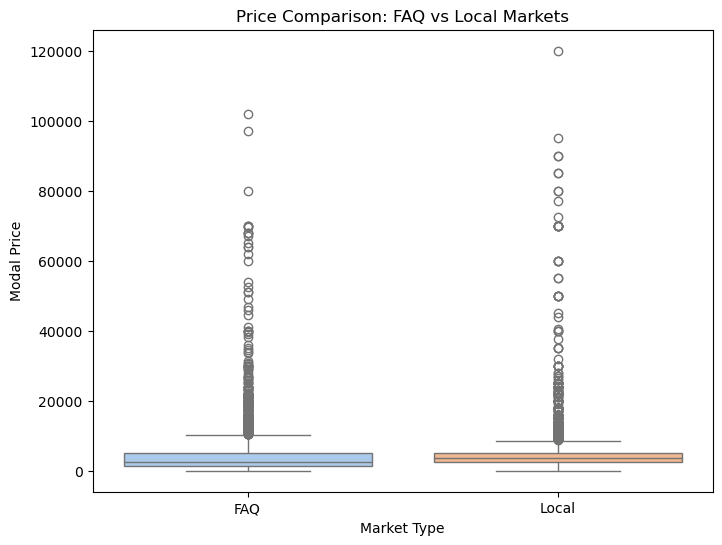

In [38]:
from scipy.stats import mannwhitneyu
faq_prices = df[df['Grade'] == 'FAQ']['Modal_Price']
local_prices = df[df['Grade'] == 'Local']['Modal_Price']

# Perform Mann-Whitney U Test
stat, p_value = mannwhitneyu(faq_prices, local_prices, alternative='two-sided')

print("📊 Mann-Whitney U Test Result:")
print(f"Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Result: There is a significant difference in pricing between FAQ and Local markets.")
else:
    print("Result: No significant difference in pricing between FAQ and Local markets.")

# Optional visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[df['Grade'].isin(['FAQ', 'Local'])], 
            x='Grade', y='Modal_Price', palette='pastel')
plt.title("Price Comparison: FAQ vs Local Markets")
plt.xlabel("Market Type")
plt.ylabel("Modal Price")
plt.show()

This shows that there is a significant difference betweeen the prices at FAQ and Local markets across commodities

4. Is there a relationship between Market Type(Grade) and Commodity Category?

In [20]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Commodity'], df['Grade'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 = {chi2}, p = {p}")


Chi2 = 22676.63217719011, p = 0.0


Since p < 0.05, we reject the null hypothesis, which means:
There is a significant association between the type of commodity and the market type (FAQ, Local, etc.).
 Different commodities are not randomly spread across market types. Some commodities are more likely to be sold in specific markets (e.g., FAQ vs. Local).